In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

# Outputs of the growth perturbation

In [72]:
# ode_df_landscape = pd.read_csv('eem_growth_exp_landscape.csv').drop(['Unnamed: 0'], axis=1)
ode_df_timeseries = pd.read_csv('eem_growth_exp_timeseries.csv').drop(['Unnamed: 0'], axis=1)
# turn veg into percentages for interpretation on graph
ode_df_timeseries["grasslandParkland"] = ode_df_timeseries["grasslandParkland"] * 89.9
ode_df_timeseries["thornyScrub"] = ode_df_timeseries["thornyScrub"] * 4.3
ode_df_timeseries["woodland"] = ode_df_timeseries["woodland"] * 5.8
ode_df_timeseries["roeDeer"] = ode_df_timeseries["roeDeer"] * 12

In [73]:
# adjust df for graphing
melted_df = ode_df_timeseries.melt(id_vars=['time', 'magnitude', 'repro_changes'],
                                   value_vars=['grasslandParkland', 'thornyScrub', 'woodland', 'roeDeer'],
                                   var_name='Variable', value_name='Value')
melted_df = melted_df.rename(columns={'magnitude': 'Duration (years)', 'repro_changes': 'Change in veg reproduction'})


In [74]:
# look only at the perturbation section
df = melted_df.loc[melted_df["time"] >= 515]

In [75]:
# look at the first half
df = df.loc[df["time"] <= 750]
# then the peaks/valleys
# df = df.loc[df["time"] >= 751]
# df = df.loc[df["time"] <= 950]

In [76]:
x = df.loc[df["Variable"] == "grasslandParkland"]
y = x.loc[x["Value"] == 0]
y["Duration (years)"].min()

32.45620315288905

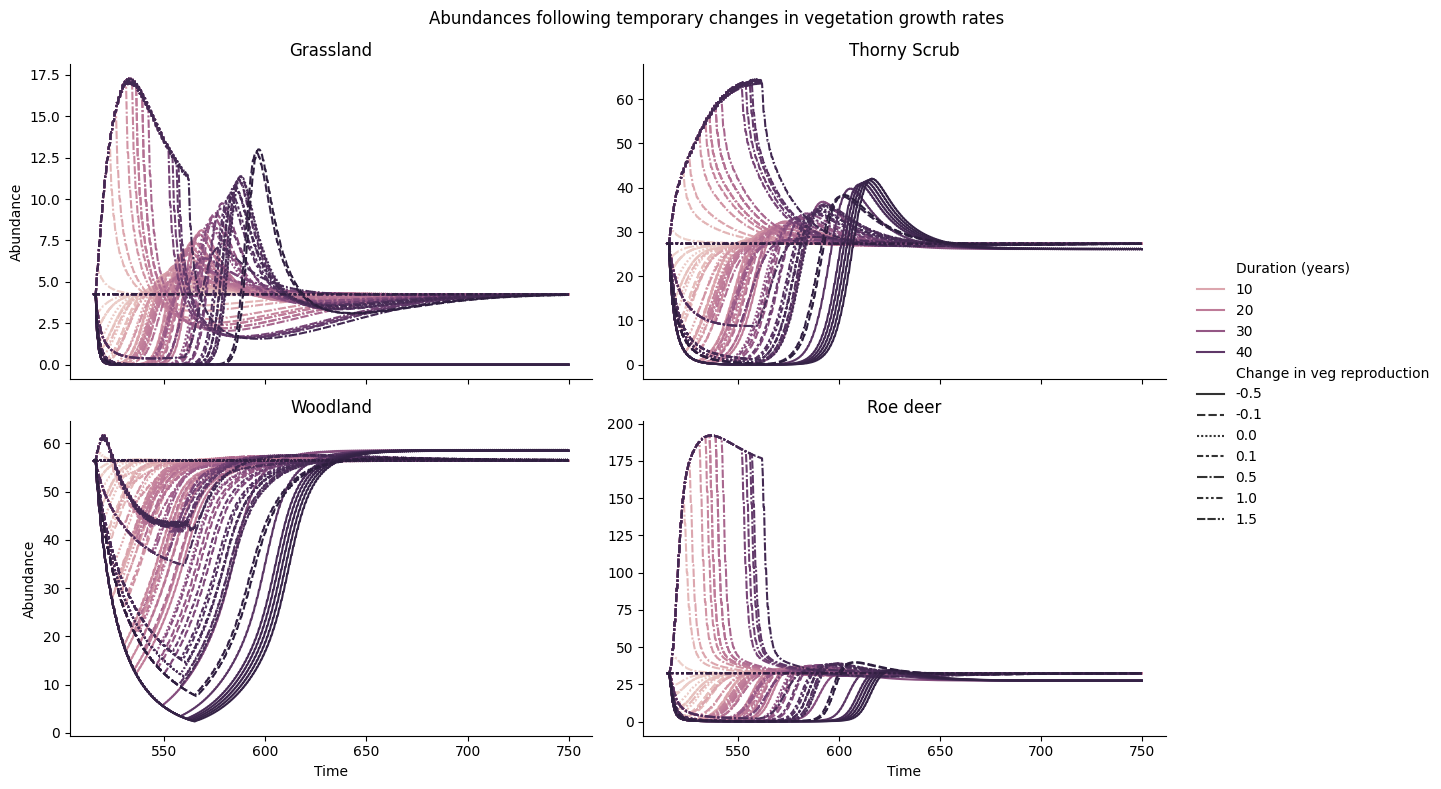

In [77]:
# Create a FacetGrid with subplots
g = sns.FacetGrid(df, col='Variable', col_wrap=2, height=4, aspect=1.5, sharey=False)

# Plot lineplot for each variable
g.map_dataframe(sns.lineplot, x='time', y='Value', hue='Duration (years)', style='Change in veg reproduction', ci=None, estimator = None)

# Set axis labels
g.set_axis_labels('Time', 'Abundance')

# Set title for each subplot
titles = ['Grassland', 'Thorny Scrub', 'Woodland', 'Roe deer']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)

# add legend
g.add_legend()

plt.suptitle('Abundances following temporary changes in vegetation growth rates')

# Adjust spacing between subplots
g.tight_layout()

# Display the plot
plt.show()

# Unstable states

In [87]:
# ode_df_landscape = pd.read_csv('eem_growth_exp_landscape.csv').drop(['Unnamed: 0'], axis=1)
df1 = pd.read_csv('eem_growth_exp_tipping.csv').drop(['Unnamed: 0'], axis=1)
df2 = pd.read_csv('eem_growth_exp_tipping_grass.csv').drop(['Unnamed: 0'], axis=1)


tipping_points = pd.concat([df1, df2]).reset_index(drop=True)

# turn veg into percentages for interpretation on graph
tipping_points["grasslandParkland"] = tipping_points["grasslandParkland"] * 89.9
tipping_points["thornyScrub"] = tipping_points["thornyScrub"] * 4.3
tipping_points["woodland"] = tipping_points["woodland"] * 5.8
tipping_points["roeDeer"] = tipping_points["roeDeer"] * 12

In [88]:
# adjust df for graphing
melted_df_tipping = tipping_points.melt(id_vars=['time', 'New Equilibrium'],
                                   value_vars=['grasslandParkland', 'thornyScrub', 'woodland', 'roeDeer'],
                                   var_name='Variable', value_name='Value').reset_index(drop=True)

In [89]:
melted_df_tipping = melted_df_tipping.loc[melted_df_tipping["time"] <=1000]

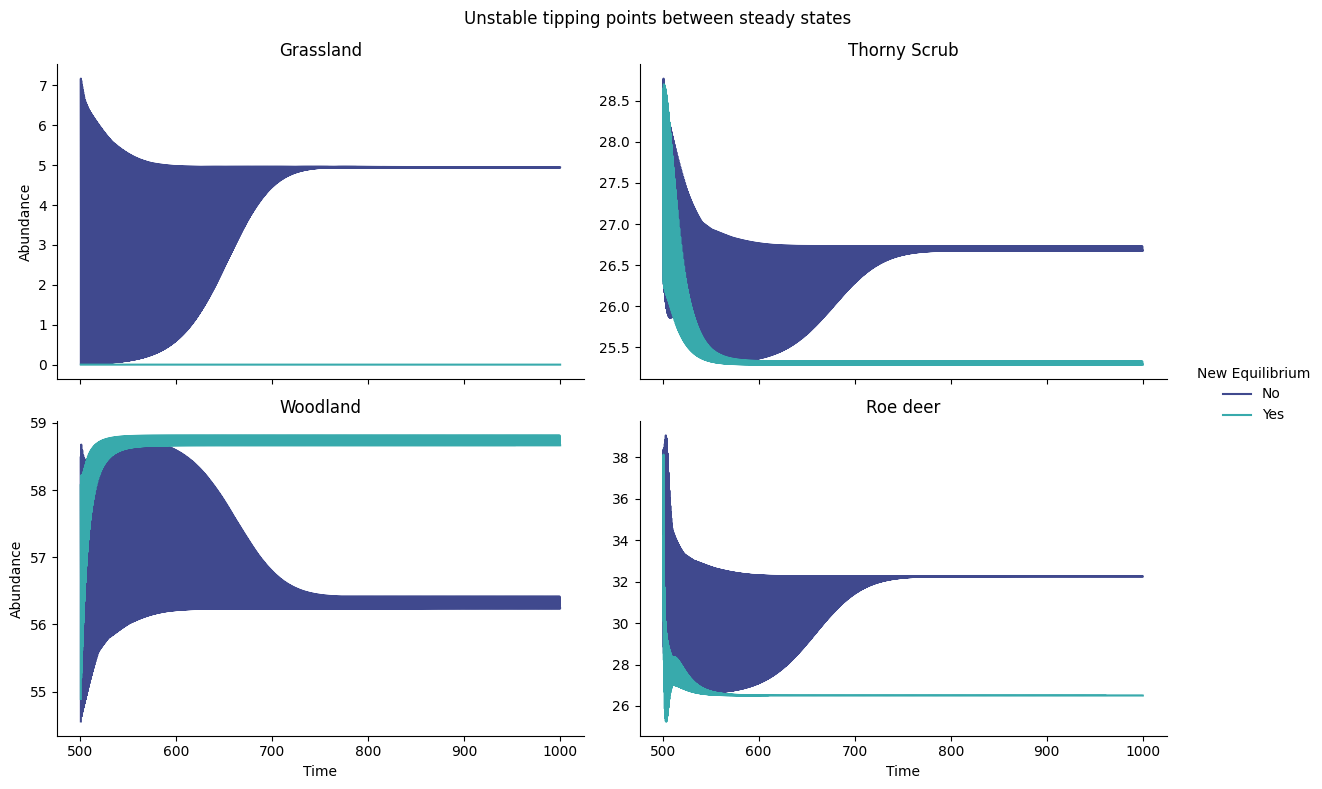

In [90]:
# Create a FacetGrid with subplots
g = sns.FacetGrid(melted_df_tipping, col='Variable', hue="New Equilibrium", col_wrap=2, height=4, aspect=1.5, sharey=False, palette="mako")

# Plot lineplot for each variable
g.map_dataframe(sns.lineplot, x='time', y='Value', ci=None, estimator = None)

# Set axis labels
g.set_axis_labels('Time', 'Abundance')

# Set title for each subplot
titles = ['Grassland', 'Thorny Scrub', 'Woodland', 'Roe deer']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)

# add legend
g.add_legend()

plt.suptitle('Unstable tipping points between steady states')

# Adjust spacing between subplots
g.tight_layout()

# Display the plot
plt.show()

# Now look at perturbation 2

In [91]:
df_combined = pd.read_csv('eem_stochastic_exp_timeseries.csv').drop(['Unnamed: 0'], axis=1) 

In [92]:
# adjust df for graphing
df = df_combined.melt(id_vars=['time', 'Noise'],
                                   value_vars=['grasslandParkland', 'thornyScrub', 'woodland', 'roeDeer'],
                                   var_name='Variable', value_name='Value')

# look only at last 500 years (from equilibrium)
df = df.loc[df["time"] >= 500].reset_index()

In [95]:
grouped_df = df.groupby(['time', 'Variable', 'Noise'])['Value'].agg(median=np.median, percentile_95th=lambda x: np.percentile(x, 95), percentile_5th=lambda x: np.percentile(x, 5)).reset_index()

In [157]:
# at the last time, what is the range of output values? 
last = grouped_df.loc[grouped_df["time"] == 1016.75]
last

,time,Variable,Noise,median,percentile_95th,percentile_5th
24800,1016.75,grasslandParkland,0.000,0.047257,0.047257,0.047257
24801,1016.75,grasslandParkland,0.001,0.036708,0.107537,0.016895
24802,1016.75,grasslandParkland,0.002,0.042022,0.154970,0.005571
24803,1016.75,grasslandParkland,0.003,0.024786,0.486212,0.000688
24804,1016.75,roeDeer,0.000,2.710418,2.710418,2.710418
24805,1016.75,roeDeer,0.001,2.271579,7.108483,1.003901
24806,1016.75,roeDeer,0.002,2.897403,12.039177,0.626188
24807,1016.75,roeDeer,0.003,3.651476,48.265099,0.185485
24808,1016.75,thornyScrub,0.000,6.354342,6.354342,6.354342
24809,1016.75,thornyScrub,0.001,5.726152,9.004362,4.243877


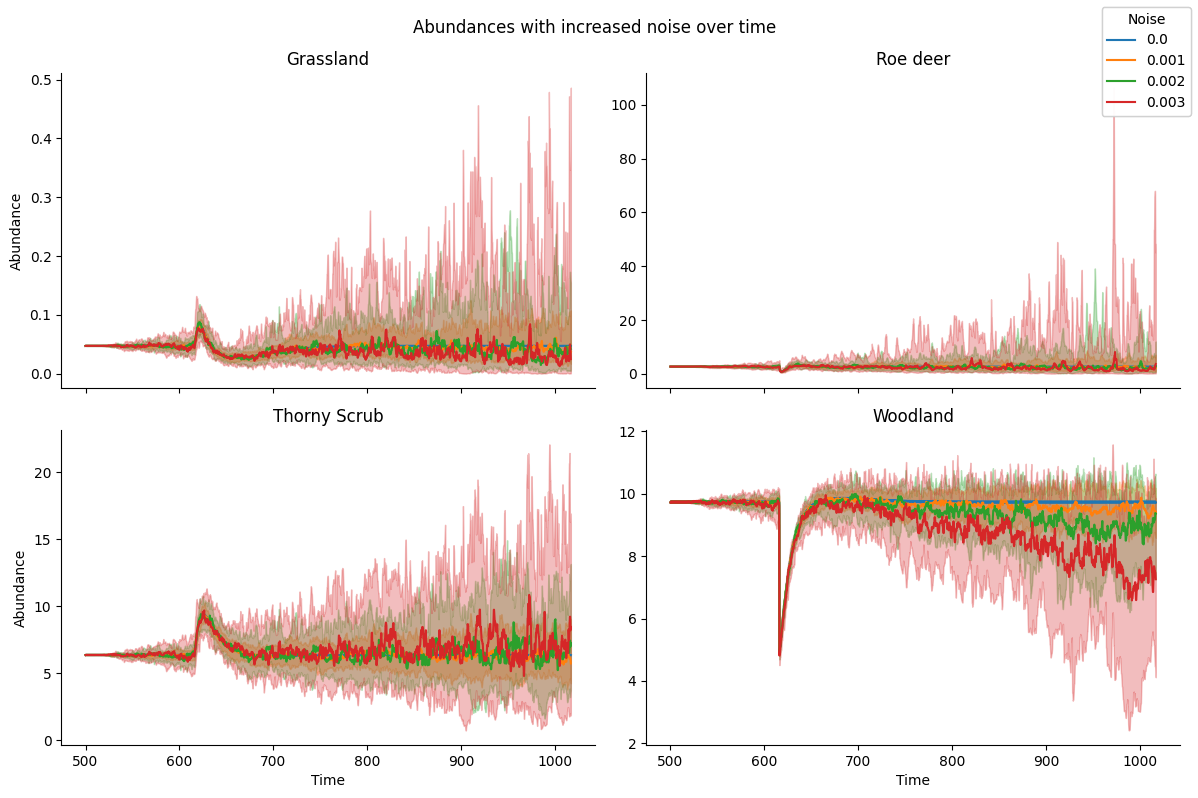

In [96]:
# Create a FacetGrid with subplots
g = sns.FacetGrid(grouped_df, col='Variable', col_wrap=2, height=4, aspect=1.5, hue="Noise", sharey=False)


# Iterate over each variable and plot the lines with fill_between
for variable, ax in zip(grouped_df['Variable'].unique(), g.axes):
    # Filter the data for the specific variable
    data = grouped_df[grouped_df['Variable'] == variable]
    
    # Get the unique noise levels for the variable
    noise_levels = data['Noise'].unique()
    
    # Iterate over each noise level and plot the fill between the percentiles
    for i, noise in enumerate(noise_levels):
        # Filter the data for the specific noise level
        noise_data = data[data['Noise'] == noise]
        
        # Get the values for the percentiles
        lower = noise_data[noise_data.columns[-2]].values
        upper = noise_data[noise_data.columns[-1]].values
        
        # Get the color for the line and fill_between
        line_color = sns.color_palette()[i]
        fill_color = line_color
        
        # Plot the line
        sns.lineplot(data=noise_data, x='time', y='median', color=line_color, ax=ax, legend=False)
        
        # Plot the fill_between
        ax.fill_between(noise_data['time'], lower, upper, alpha=0.3, color=fill_color)
    
    # Set the title for each subplot
    ax.set_title(variable)

# Set the overall title for the facetgrid
g.fig.suptitle("Abundances with increased noise over time")

# Set axis labels
g.set_axis_labels('Time', 'Abundance')

# Set title for each subplot
titles = ['Grassland', 'Roe deer','Thorny Scrub', 'Woodland']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)

# Adjust the spacing between subplots
g.fig.tight_layout()

# legend
handles, labels = [], []
for i, noise in enumerate(grouped_df['Noise'].unique()):
    line_color = sns.color_palette()[i]
    fill_color = line_color
    handles.append(plt.Line2D([], [], color=line_color, linestyle='-', label=noise))
    labels.append(noise)

# Add style information to the legend
# handles.extend([
#                 plt.Line2D([], [], color='black', linestyle='--', label='Optimised')])
# labels.extend(['Optimised'])

legend = g.fig.legend(handles, labels, title='Noise', loc='upper right')
plt.gca().add_artist(legend)

# Show the plot
plt.show()

# Look at GA outputs

## Ecological resilience

In [130]:
# df1 = pd.read_csv('eem_ga_timeseries_uncertainty_ga_perturb1.csv').drop(['Unnamed: 0'], axis=1)
# df2 = pd.read_csv('eem_ga_timeseries_uncertainty_ga_perturb1_undesirable.csv').drop(['Unnamed: 0'], axis=1)
df3 = pd.read_csv('eem_ga_timeseries_uncertainty_ga_original.csv').drop(['Unnamed: 0'], axis=1)
df4 = pd.read_csv('eem_ga_timeseries_uncertainty_ga_perturb2.csv').drop(['Unnamed: 0'], axis=1)
df4["State"] = "Optimised"
df5 = pd.read_csv('eem_ga_timeseries_uncertainty_ga_perturb2_undesirable.csv').drop(['Unnamed: 0'], axis=1)

df = pd.concat([df3, df4, df5])


df["grasslandParkland"] = df["grasslandParkland"] * 89.9
df["thornyScrub"] = df["thornyScrub"] * 4.3
df["woodland"] = df["woodland"] * 5.8
df["roeDeer"] = df["roeDeer"] * 12


In [131]:
# order it so "Original" shows first on the graph
desired_order = ['Original', 'Undesirable', 'Optimised']
df = df.sort_values(by='State', key=lambda x: pd.Categorical(x, categories=desired_order))

In [132]:
df['Experiment'] = 'Perturbation ' + df['Perturbation'] + ': ' + df['State']
df['Experiment'] = df['Experiment'].str.replace('Perturbation Original: Original', 'Original steady state')

In [133]:
# adjust df for graphing
melted_df_ga_all = df.melt(id_vars=['time', 'run_number', 'Experiment', 'State'],
                                   value_vars=['grasslandParkland', 'thornyScrub', 'woodland', 'roeDeer'],
                                   var_name='Variable', value_name='Value')

In [134]:
end_all = melted_df_ga_all.loc[melted_df_ga_all["time"] == 1016.75]

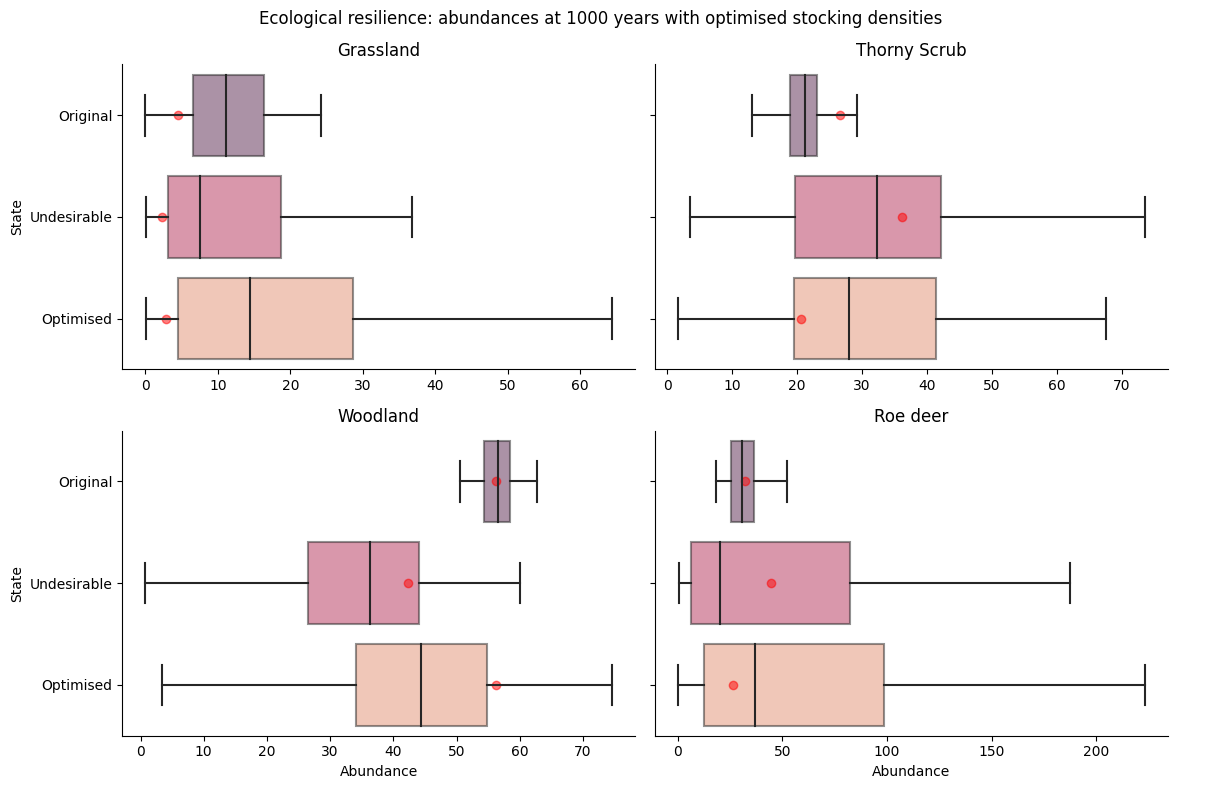

In [158]:
# Create a FacetGrid with subplots
g = sns.FacetGrid(end_all, col='Variable', col_wrap=2, height=4, aspect=1.5, sharey=True, sharex=False)

# Plot lineplot for each variable
g.map_dataframe(sns.boxplot, x='Value', y='State', dodge=False, boxprops=dict(alpha=.5), showfliers = False,  palette="rocket")

# Set axis labels
g.set_axis_labels('Abundance')

# [0.57857411 2.31529088 0.03222031 0.95046203 5.16644033 2.21263461
#  0.15264488 4.84635936 9.66626738]


red_dot_locations = {
    'grasslandParkland': {
        'Original': {'x': [0.05*89.9], 'y': [0]},
        'Undesirable': {'x': [0.025*89.9], 'y': [1]},
        'Optimised': {'x': [0.032*89.9], 'y': [2]},

    },
    'roeDeer': {
        'Original': {'x': [2.7*12], 'y': [0]},
        'Undesirable': {'x': [3.7*12], 'y': [1]},
        'Optimised': {'x': [2.2*12], 'y': [2]},
            }, 
    'thornyScrub': {
        'Original': {'x': [6.2*4.3], 'y': [0]},
        'Undesirable': {'x': [8.4*4.3], 'y': [1]},
        'Optimised': {'x': [4.8*4.3], 'y': [2]},
            }, 
    'woodland': {
        'Original': {'x': [9.7*5.8], 'y': [0]},
        'Undesirable': {'x': [7.3*5.8], 'y': [1]},
        'Optimised': {'x': [9.7*5.8], 'y': [2]},
            },        
}

# Set title for each subplot
titles = ['Grassland', 'Thorny Scrub', 'Woodland', 'Roe deer']

for ax, variable, title in zip(g.axes.flat, end_all['Variable'].unique(), titles):
    ax.set_title(title)
    locations = red_dot_locations.get(variable, {})
    for experiment, locs in locations.items():
        ax.scatter(locs['x'], locs['y'], color='red', alpha=0.5)



# add legend
g.add_legend()

plt.suptitle('Ecological resilience: abundances at 1000 years with optimised stocking densities')
# Adjust spacing between subplots
g.tight_layout()

# Display the plot
plt.show()

## Engineering resilience

In [48]:
df = pd.read_csv('eem_ga_timeseries_uncertainty_ga_perturb1_engineering_original.csv').drop(['Unnamed: 0'], axis=1)
# df2 = pd.read_csv('eem_ga_timeseries_uncertainty_ga_perturb1_undesirable.csv').drop(['Unnamed: 0'], axis=1)
# df3 = pd.read_csv('eem_ga_timeseries_uncertainty_ga_original.csv').drop(['Unnamed: 0'], axis=1)
# df4 = pd.read_csv('eem_ga_timeseries_uncertainty_ga_perturb2.csv').drop(['Unnamed: 0'], axis=1)
# df5 = pd.read_csv('eem_ga_timeseries_uncertainty_ga_perturb2_undesirable.csv').drop(['Unnamed: 0'], axis=1)

# df = pd.concat([df1, df2, df3, df4, df5])


df["grasslandParkland"] = df["grasslandParkland"] * 89.9
df["thornyScrub"] = df["thornyScrub"] * 4.3
df["woodland"] = df["woodland"] * 5.8
df["roeDeer"] = df["roeDeer"] * 12

# order it so "Original" shows first on the graph
desired_order = ['Original', 'One', 'Two']
df = df.sort_values(by='Perturbation', key=lambda x: pd.Categorical(x, categories=desired_order))


In [50]:
df['Experiment'] = 'Perturbation ' + df['Perturbation'] + ': ' + df['State']
df['Experiment'] = df['Experiment'].str.replace('Perturbation Original: Original', 'Original steady state')

In [54]:
df

,exmoorPony,fallowDeer,grasslandParkland,longhornCattle,redDeer,roeDeer,tamworthPig,thornyScrub,woodland,time,Perturbation,State,run_number,Reached Equilibrium,Experiment
0,0.000000,0.000000,89.900000,0.000000,0.000000,12.000000,0.000000,4.300000,5.800000,0.000,Original,Original,0,2000,Original steady state
406397,1.104135,10.847808,16.632248,2.523341,3.694041,32.291725,1.223920,26.535904,50.208595,338.750,Original,Original,66,2000,Original steady state
406398,0.650000,5.900000,16.632248,1.500000,2.700000,32.291725,0.550000,26.535904,50.208595,339.000,Original,Original,66,2000,Original steady state
406399,0.890115,8.469104,16.695963,2.042449,3.252637,32.305186,0.883932,26.621457,50.434970,339.375,Original,Original,66,2000,Original steady state
406400,1.104135,10.847808,16.632248,2.523341,3.694041,32.291725,1.223920,26.535904,50.208595,339.750,Original,Original,66,2000,Original steady state
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203200,0.907714,7.286438,14.559253,1.928348,2.740346,36.043290,0.914111,24.303879,52.636731,678.375,Original,Original,33,2000,Original steady state
203201,1.141486,8.419536,14.521610,2.290740,2.767149,36.032869,1.295574,24.259918,52.511868,678.750,Original,Original,33,2000,Original steady state
203202,0.650000,5.900000,14.521610,1.500000,2.700000,36.032869,0.550000,24.259918,52.511868,679.000,Original,Original,33,2000,Original steady state
203204,1.141487,8.419576,14.521292,2.290734,2.767159,36.032854,1.295575,24.260136,52.511899,679.750,Original,Original,33,2000,Original steady state


In [57]:
# adjust df for graphing
melted_df_ga_all = df.melt(id_vars=['time', 'run_number', 'Experiment', 'State', 'Reached Equilibrium'],
                                   value_vars=['grasslandParkland', 'thornyScrub', 'woodland', 'roeDeer'],
                                   var_name='Variable', value_name='Value')

In [69]:
# how many reached the same equilibrium?
all_equils = melted_df_ga_all.loc[melted_df_ga_all["time"] == 1016.75]
reached_equil = all_equils.loc[all_equils["Reached Equilibrium"] < 2000]
len(reached_equil)

32

In [70]:
print("min", melted_df_ga_all["Reached Equilibrium"].min())
print("max", reached_equil["Reached Equilibrium"].max())

min 547
max 590


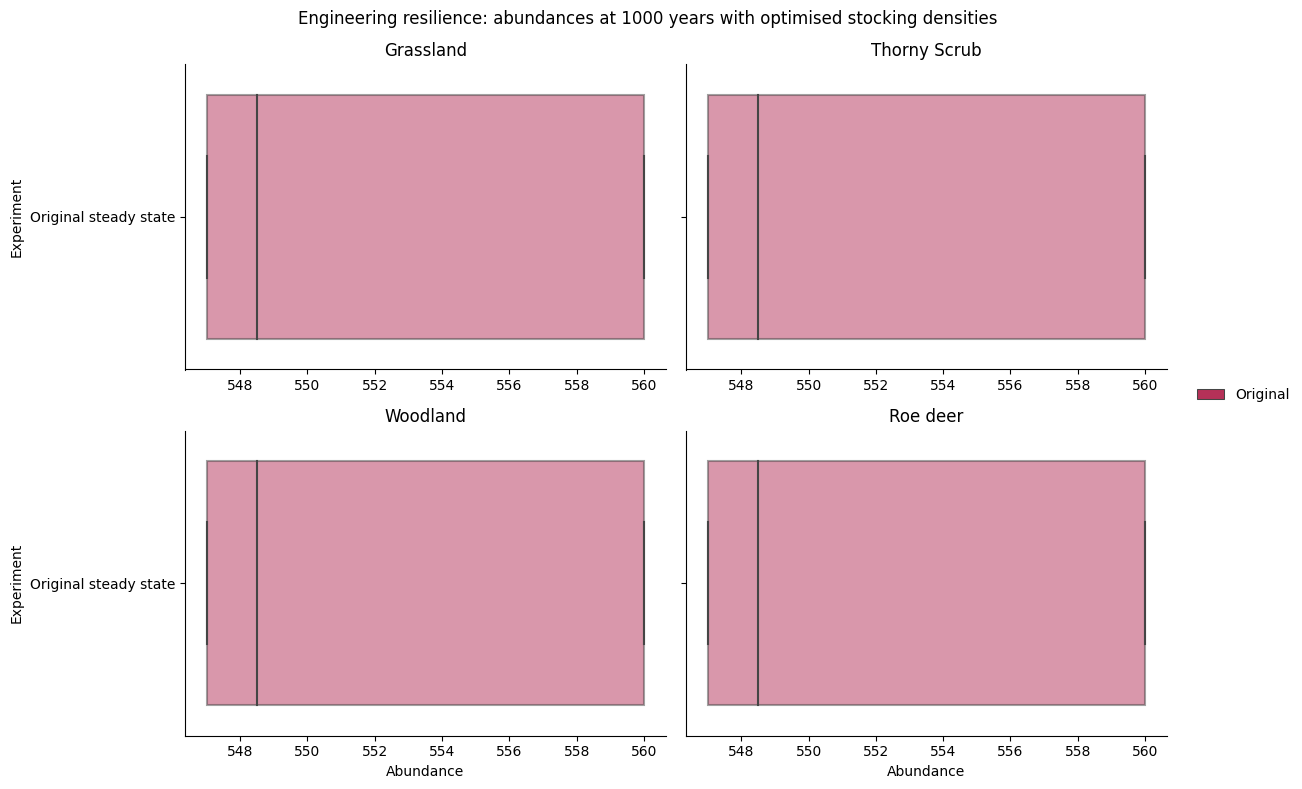

In [71]:
# Create a FacetGrid with subplots
g = sns.FacetGrid(reached_equil, col='Variable', col_wrap=2, height=4, aspect=1.5, sharey=True, sharex=False)

# Plot lineplot for each variable
g.map_dataframe(sns.boxplot, x='Reached Equilibrium', y='Experiment', hue='State', dodge=False, boxprops=dict(alpha=.5), showfliers = False,  palette="rocket")

# Set axis labels
g.set_axis_labels('Abundance')


# Set title for each subplot
titles = ['Grassland', 'Thorny Scrub', 'Woodland', 'Roe deer']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)

# add legend
g.add_legend()

plt.suptitle('Engineering resilience: abundances at 1000 years with optimised stocking densities')
# Adjust spacing between subplots
g.tight_layout()

# Display the plot
plt.show()

In [124]:
ga_ode_stochastic_timeseries = pd.read_csv('eem_ga_timeseries.csv').drop(['Unnamed: 0'], axis=1)

In [125]:
# adjust df for graphing
melted_df_stochastic_ga = ga_ode_stochastic_timeseries.melt(id_vars=['time'],
                                   value_vars=['grasslandParkland', 'thornyScrub', 'woodland', 'roeDeer'],
                                   var_name='Variable', value_name='Value')

In [126]:
# look only at the perturbation section
df_ga = melted_df_stochastic_ga.loc[melted_df_stochastic_ga["time"] >= 499]

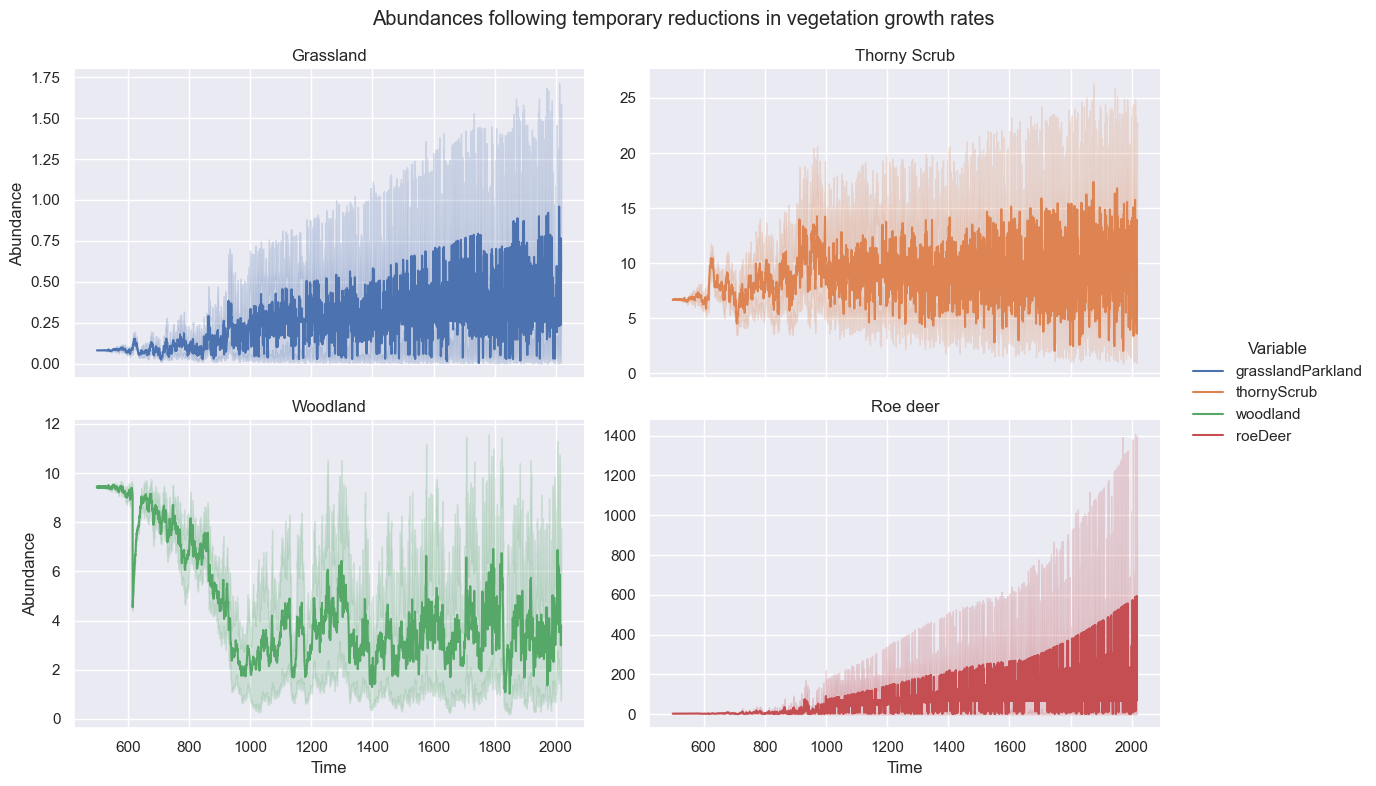

In [127]:
# Create a FacetGrid with subplots
g = sns.FacetGrid(df_ga, col='Variable', col_wrap=2, height=4, aspect=1.5, sharey=False, hue="Variable")

# Plot lineplot for each variable
g.map_dataframe(sns.lineplot, x='time', y='Value', ci=95)

# Set axis labels
g.set_axis_labels('Time', 'Abundance')

# Set title for each subplot
titles = ['Grassland', 'Thorny Scrub', 'Woodland', 'Roe deer']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)

# add legend
g.add_legend()

plt.suptitle('Abundances following temporary reductions in vegetation growth rates')
# Adjust spacing between subplots
g.tight_layout()

# Display the plot
plt.show()

# And the uncertainty with the ODE

In [266]:
df1 = pd.read_csv('eem_ga_timeseries_uncertainty.csv').drop(['Unnamed: 0'], axis=1)
df2 =  pd.read_csv('eem_ga_timeseries_uncertainty_ga_0025.csv').drop(['Unnamed: 0'], axis=1)
# df3 =  pd.read_csv('eem_ga_timeseries_uncertainty_ga_005.csv').drop(['Unnamed: 0'], axis=1)
# df4 =  pd.read_csv('eem_ga_timeseries_uncertainty_ga_0075.csv').drop(['Unnamed: 0'], axis=1)
df_combined = pd.concat([df1, df2])

In [267]:
# adjust df for graphing
melted_df_stochastic_ga = df_combined.melt(id_vars=['time', 'Noise', 'Optimised'],
                                   value_vars=['grasslandParkland', 'thornyScrub', 'woodland', 'roeDeer'],
                                   var_name='Variable', value_name='Value')

In [268]:
# look only at the perturbation section
df_ga = melted_df_stochastic_ga.loc[melted_df_stochastic_ga["time"] >= 499]

In [274]:
df_ga

,time,Noise,Optimised,Variable,Value
1494,499.000,0.0010,no,grasslandParkland,0.243773
1495,499.375,0.0010,no,grasslandParkland,0.244522
1496,499.750,0.0010,no,grasslandParkland,0.243773
1497,500.000,0.0010,no,grasslandParkland,0.243773
1498,500.375,0.0010,no,grasslandParkland,0.244522
...,...,...,...,...,...
18191995,1515.375,0.0025,yes,roeDeer,0.184529
18191996,1515.750,0.0025,yes,roeDeer,0.147354
18191997,1516.000,0.0025,yes,roeDeer,0.147354
18191998,1516.375,0.0025,yes,roeDeer,0.144259


In [293]:
# calculate median
grouped_df = df_ga.groupby(['time', 'Variable', 'Noise', 'Optimised'])['Value'].agg(median=np.median, percentile_95th=lambda x: np.percentile(x, 95), percentile_5th=lambda x: np.percentile(x, 5)).reset_index()
grouped_df

,time,Variable,Noise,Optimised,median,percentile_95th,percentile_5th
0,499.00,grasslandParkland,0.0010,no,0.123941,0.236075,0.000157
1,499.00,grasslandParkland,0.0025,no,0.123941,0.236075,0.000157
2,499.00,grasslandParkland,0.0025,yes,0.123941,0.236075,0.000157
3,499.00,grasslandParkland,0.0050,no,0.123941,0.236075,0.000157
4,499.00,grasslandParkland,0.0075,no,0.123941,0.236075,0.000157
...,...,...,...,...,...,...,...
61075,1516.75,woodland,0.0010,no,8.529600,10.775799,6.192262
61076,1516.75,woodland,0.0025,no,0.918417,8.058692,0.000000
61077,1516.75,woodland,0.0025,yes,2.866398,10.964015,0.000000
61078,1516.75,woodland,0.0050,no,0.000000,0.000111,0.000000


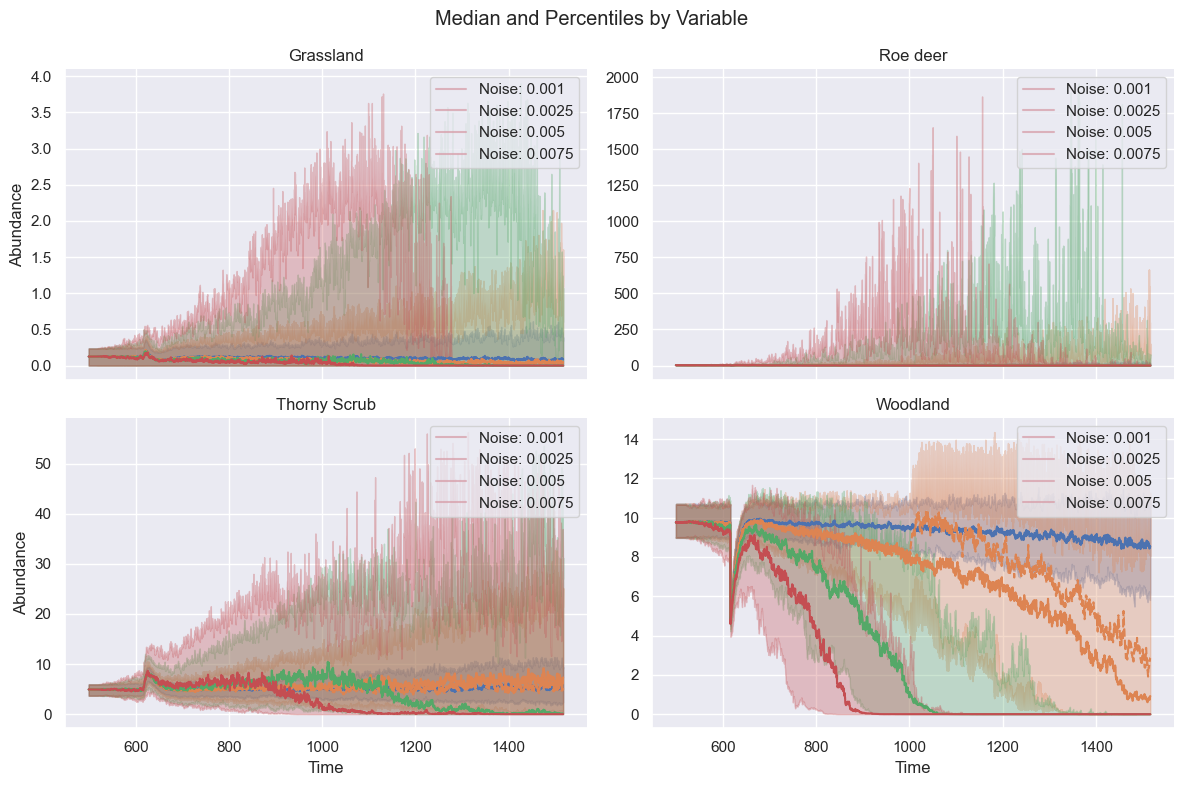

In [331]:
# Create a FacetGrid with subplots
g = sns.FacetGrid(grouped_df, col='Variable', col_wrap=2, height=4, aspect=1.5, hue="Noise", sharey=False)


# Iterate over each variable and plot the lines with fill_between
for variable, ax in zip(grouped_df['Variable'].unique(), g.axes):
    # Filter the data for the specific variable
    data = grouped_df[grouped_df['Variable'] == variable]
    
    # Get the unique noise levels for the variable
    noise_levels = data['Noise'].unique()
    
    # Initialize a list to store the lines and labels for the legend
    lines = []
    labels = []
    
    # Iterate over each noise level and plot the fill between the percentiles
    for i, noise in enumerate(noise_levels):
        # Filter the data for the specific noise level
        noise_data = data[data['Noise'] == noise]
        
        # Get the values for the percentiles
        lower = noise_data[noise_data.columns[-2]].values
        upper = noise_data[noise_data.columns[-1]].values
        
        # Get the color for the line and fill_between
        line_color = sns.color_palette()[i]
        fill_color = line_color
        
        # Plot the line
        sns.lineplot(data=noise_data, x='time', y='median', style = "Optimised", color=line_color, ax=ax)
        
        # Plot the fill_between
        ax.fill_between(noise_data['time'], lower, upper, alpha=0.3, color=fill_color)
    
        # Append the line and label to the legend lists
        lines.append(line)
        labels.append(f"Noise: {noise}")
    
    # Add the legend for the variable
    ax.legend(lines, labels)

    # Set the title for each subplot
    ax.set_title(variable)

# Set the overall title for the facetgrid
g.fig.suptitle("Median and Percentiles by Variable")

# Set axis labels
g.set_axis_labels('Time', 'Abundance')

# Set title for each subplot
titles = ['Grassland', 'Roe deer','Thorny Scrub', 'Woodland']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)

# Adjust the spacing between subplots
g.fig.tight_layout()

# Show the plot
plt.show()

In [361]:
# it can be optimised to come back to original equilibrium, however x% still have declining woodland
optim = df_ga.loc[df_ga["Optimised"] == "yes"]
# last time step
last = optim.loc[optim["time"] == 1516.750]
wood = last.loc[last["Variable"] == "woodland"]
# value 
above = wood.loc[wood["Value"] >= 8.5] 
final = above.loc[above["Value"] <= 10.4] 
len(final)/200

0.1

In [362]:
# what is the risk of having even more woodland?
len(wood.loc[wood["Value"] > 10.4])/200

0.06

In [363]:
# what is the risk of it declining further? 
len(wood.loc[wood["Value"] < 8.5])/200

0.84